In [3]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

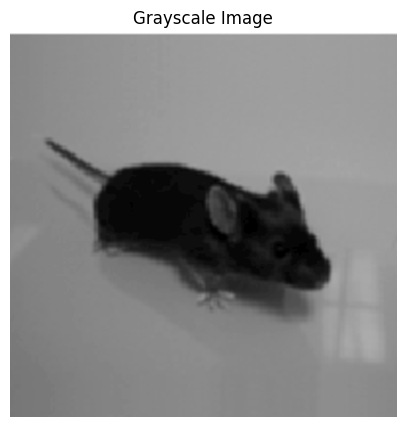

Bitstream length: 5752800
First 64 bits: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [11]:
import numpy as np
import cv2

def image_to_bits(path, show_image=True):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        raise ValueError("Image not found or unable to load.")

    cv2.imwrite("grayscale.png", img)

    if show_image:
        plt.figure(figsize=(5, 5))
        plt.imshow(img, cmap='gray')
        plt.title("Grayscale Image")
        plt.axis("off")
        plt.show()
    
    pixel_values = img.flatten()
    
    bitstream = np.unpackbits(pixel_values.astype(np.uint8))
    
    return bitstream

# Example usage
image_path = "test.png"
bits = image_to_bits(image_path)

print(f"Bitstream length: {len(bits)}")
print("First 64 bits:", bits[:64])

Saved: ofdm_signal_128Hz.wav


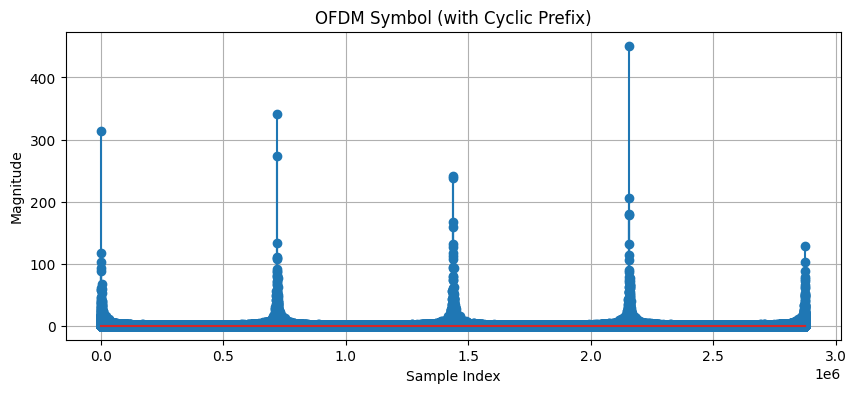

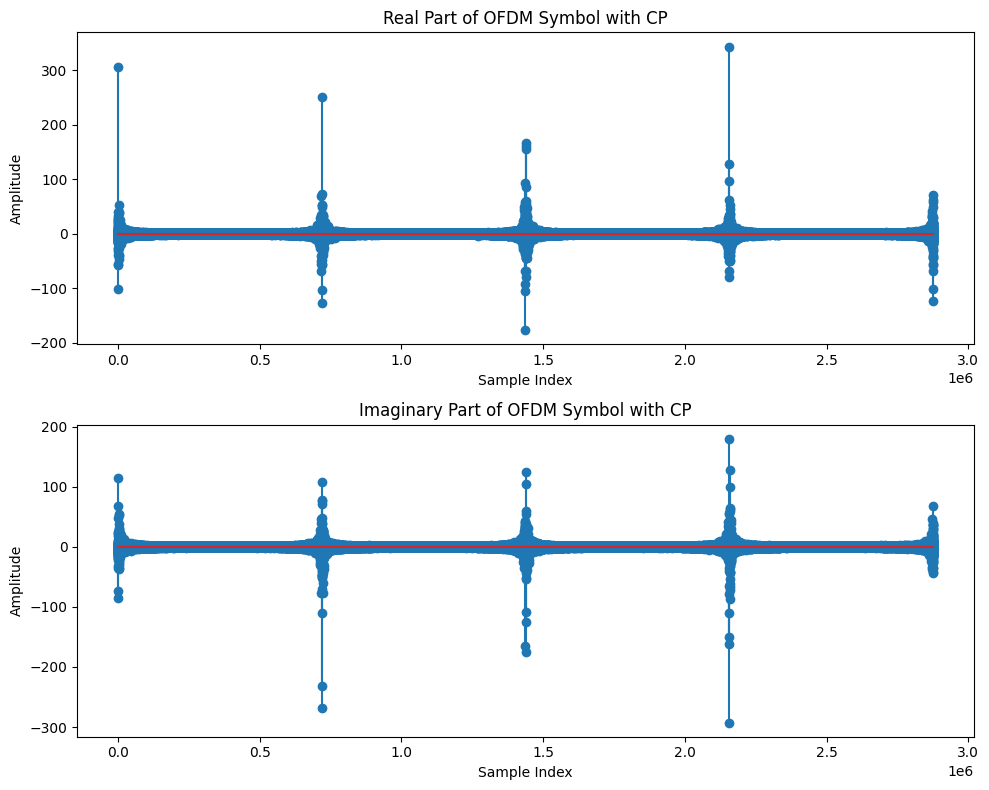

In [12]:
# Parameters
# N = 64  # Number of subcarriers
L_CP = 16  # Length of cyclic prefix
# num_bits = 128  # Total number of bits
num_bits = len(bits)
num_symbols = num_bits // 2  # Each QPSK symbol carries 2 bits; should equal N (64)
N = num_symbols

# Generate random bits
np.random.seed(42)
# bits = np.random.randint(0, 2, num_bits)

# QPSK mapping function
def qpsk_mapper(bit_pair):
    mapping = {
        (0, 0): 1 / np.sqrt(2) * (1 + 1j),
        (0, 1): 1 / np.sqrt(2) * (-1 + 1j),
        (1, 0): 1 / np.sqrt(2) * (1 - 1j),
        (1, 1): 1 / np.sqrt(2) * (-1 - 1j)
    }
    return mapping[tuple(bit_pair)]

# Map bits to QPSK symbols
symbols = np.array([qpsk_mapper(bits[i:i + 2]) for i in range(0, num_bits, 2)])

# Frequency domain representation: assign one symbol per subcarrier
X = symbols

# Generate the time-domain OFDM symbol using IFFT
x_time = np.fft.ifft(X, n=N) * np.sqrt(N)

# Add Cyclic Prefix
x_cp = np.concatenate([x_time[-L_CP:], x_time])

# Extract real part for saving as WAV
signal_real = np.real(x_cp)

# Define sampling rates
# sampling_rates = [16000, 32000, 44100, 48000]  # Hz
sampling_rates = [128]

for fs in sampling_rates:
    filename = f'ofdm_signal_{fs}Hz.wav'
    sf.write(filename, signal_real, fs)
    print(f'Saved: {filename}')

plt.figure(figsize=(10, 4))
plt.stem(np.abs(x_cp))
plt.xlabel('Sample Index')
plt.ylabel('Magnitude')
plt.title('OFDM Symbol (with Cyclic Prefix)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.stem(np.real(x_cp))
plt.title('Real Part of OFDM Symbol with CP')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.stem(np.imag(x_cp))
plt.title('Imaginary Part of OFDM Symbol with CP')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [9]:
print(num_bits)

5752800
